#  Huấn luyện và lưu các mô hình chuẩn bị cho dự đoán

- KNN
- Navie Bayes
- Random Forest
- Logistic Regression

Dựa vào biểu đồ chọn K (sô thuộc tính) khi PCA được vẽ ở file preprocess.ipynb nên chọn k=5

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, mean_squared_error
import pickle

df = pd.read_csv('data/normalized_dry_bean_dataset.csv', sep=',')
y = df['Class']
X = df.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape    

((10861, 17), (10861,))

In [55]:
# k = 5
# pca = PCA(n_components=k)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Mô hình KNN

Giá trị K tốt nhất tìm được: 13 (Độ chính xác: 0.9242)


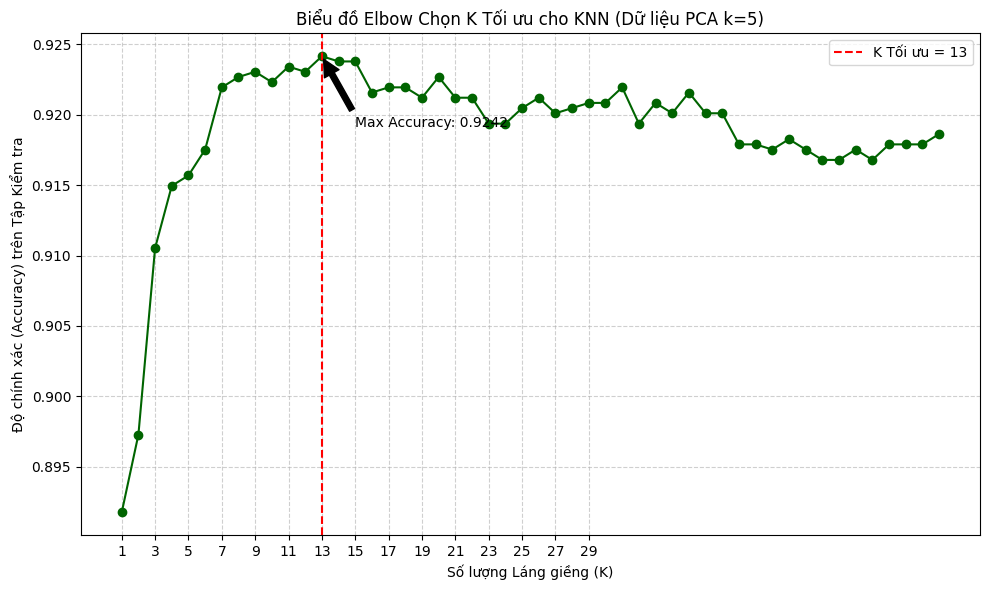

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier


# accuracies = []
# k_range = range(1, 51)

# for k in k_range:
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)

# # Tìm giá trị K tốt nhất
# best_k = k_range[np.argmax(accuracies)]
# best_accuracy = np.max(accuracies)

# print(f"Giá trị K tốt nhất tìm được: {best_k} (Độ chính xác: {best_accuracy:.4f})")

# # Vẽ Biểu đồ Elbow
# plt.figure(figsize=(10, 6))
# plt.plot(k_range, accuracies, marker='o', linestyle='-', color='darkgreen')
# plt.title('Biểu đồ Elbow Chọn K Tối ưu cho KNN (Dữ liệu PCA k=5)')
# plt.xlabel('Số lượng Láng giềng (K)')
# plt.ylabel('Độ chính xác (Accuracy) trên Tập Kiểm tra')
# plt.xticks(np.arange(1, 31, 2))
# plt.grid(True, linestyle='--', alpha=0.6)

# # Đánh dấu điểm K tốt nhất
# plt.axvline(x=best_k, color='red', linestyle='--', label=f'K Tối ưu = {best_k}')
# plt.annotate(
#     f'Max Accuracy: {best_accuracy:.4f}',
#     xy=(best_k, best_accuracy),
#     xytext=(best_k + 2, best_accuracy - 0.005),
#     arrowprops=dict(facecolor='black', shrink=0.05),
#     fontsize=10
# )
# plt.legend()
# plt.tight_layout()
# plt.show()

Theo biểu đồ thì k tốt là 12 nhưng do hạn chế chọn số chẵn làm k nên sẽ chọn k = 13

In [7]:
import math
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Giả định X_train, y_train, X_test, y_test đã được định nghĩa
# và df.shape[0] đã được định nghĩa nếu bạn muốn dùng sq_n

sq_n = int(math.sqrt(df.shape[0])) 

for k in range(sq_n-5, sq_n+6):
# for k in range(7, 17):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred_knn = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_knn, average='weighted')
    f1 = f1_score(y_test, y_pred_knn, average='weighted')

    print(f"===== Đánh giá mô hình KNN với k = {k} =====")
    print(f"Thời gian Train: {training_time:.4f} giây") # Thêm dòng này
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    # print("\nBáo cáo chi tiết:\n", classification_report(y_test, y_pred_knn))

# Lưu mô hình KNN
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

===== Đánh giá mô hình KNN với k = 111 =====
Thời gian Train: 0.0285 giây
Accuracy : 0.9135
Precision: 0.9142
Recall   : 0.9135
F1-score : 0.9135
===== Đánh giá mô hình KNN với k = 112 =====
Thời gian Train: 0.0120 giây
Accuracy : 0.9138
Precision: 0.9145
Recall   : 0.9138
F1-score : 0.9139
===== Đánh giá mô hình KNN với k = 113 =====
Thời gian Train: 0.0183 giây
Accuracy : 0.9127
Precision: 0.9135
Recall   : 0.9127
F1-score : 0.9127
===== Đánh giá mô hình KNN với k = 114 =====
Thời gian Train: 0.0057 giây
Accuracy : 0.9138
Precision: 0.9146
Recall   : 0.9138
F1-score : 0.9139
===== Đánh giá mô hình KNN với k = 115 =====
Thời gian Train: 0.0100 giây
Accuracy : 0.9138
Precision: 0.9146
Recall   : 0.9138
F1-score : 0.9138
===== Đánh giá mô hình KNN với k = 116 =====
Thời gian Train: 0.0100 giây
Accuracy : 0.9135
Precision: 0.9142
Recall   : 0.9135
F1-score : 0.9135
===== Đánh giá mô hình KNN với k = 117 =====
Thời gian Train: 0.0162 giây
Accuracy : 0.9131
Precision: 0.9139
Recall   : 0.9

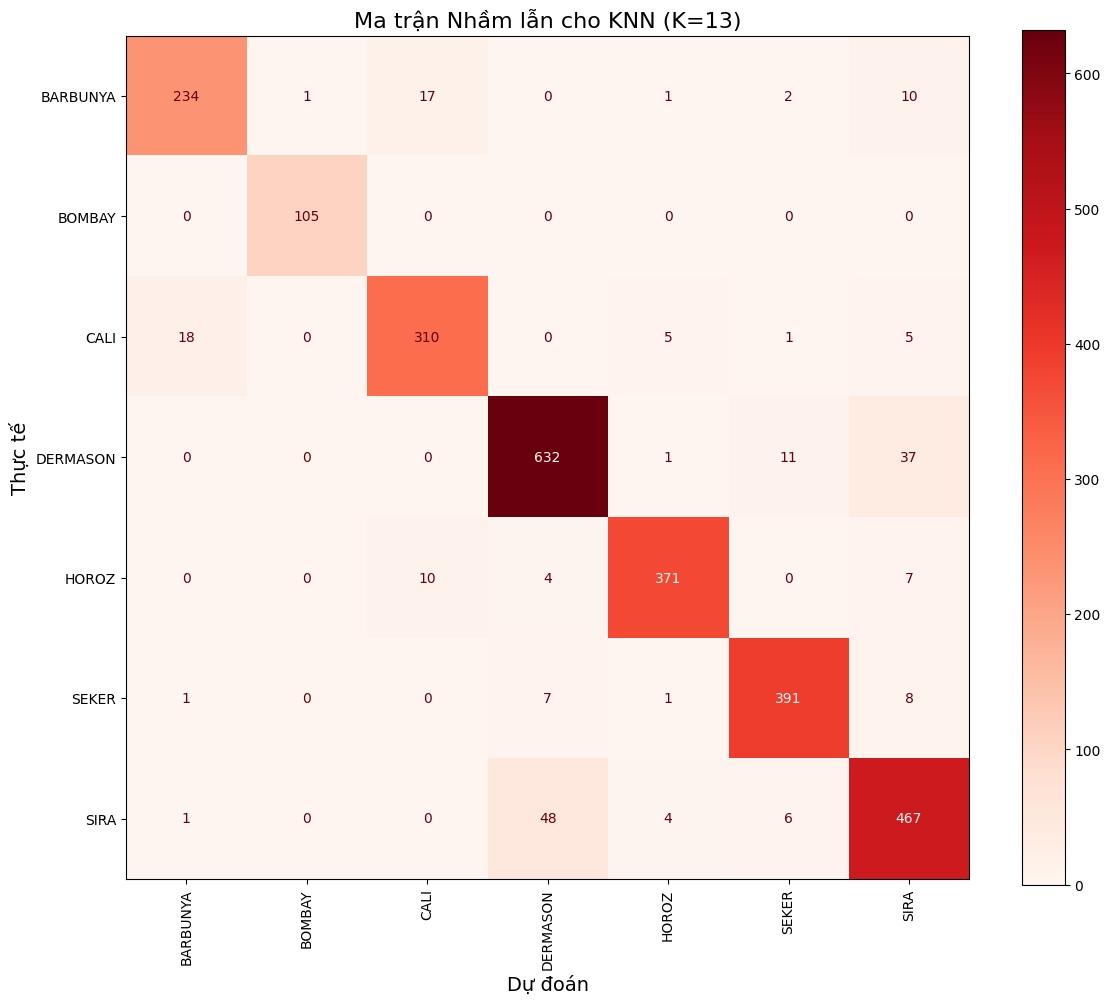

In [58]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    knn, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho KNN (K=13)', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
start_time = time.time()
gnb.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
y_pred_gnb = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_gnb, average='weighted')
f1 = f1_score(y_test, y_pred_gnb, average='weighted')
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_gnb))

print("===== Đánh giá mô hình Naive Bayes =====")
print(f"Thời gian Train: {training_time:.4f} giây")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
# print(f"RMSE     : {rmse:.4f}")
print("\nBáo cáo chi tiết:\n", classification_report(y_test, y_pred_gnb))

with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

===== Đánh giá mô hình Naive Bayes =====
Thời gian Train: 0.0252 giây
Accuracy : 0.8980
Precision: 0.8990
Recall   : 0.8980
F1-score : 0.8981

Báo cáo chi tiết:
               precision    recall  f1-score   support

    BARBUNYA       0.83      0.84      0.83       265
      BOMBAY       0.97      1.00      0.99       105
        CALI       0.89      0.86      0.87       339
    DERMASON       0.92      0.87      0.90       681
       HOROZ       0.95      0.96      0.96       392
       SEKER       0.94      0.94      0.94       408
        SIRA       0.83      0.88      0.86       526

    accuracy                           0.90      2716
   macro avg       0.90      0.91      0.91      2716
weighted avg       0.90      0.90      0.90      2716



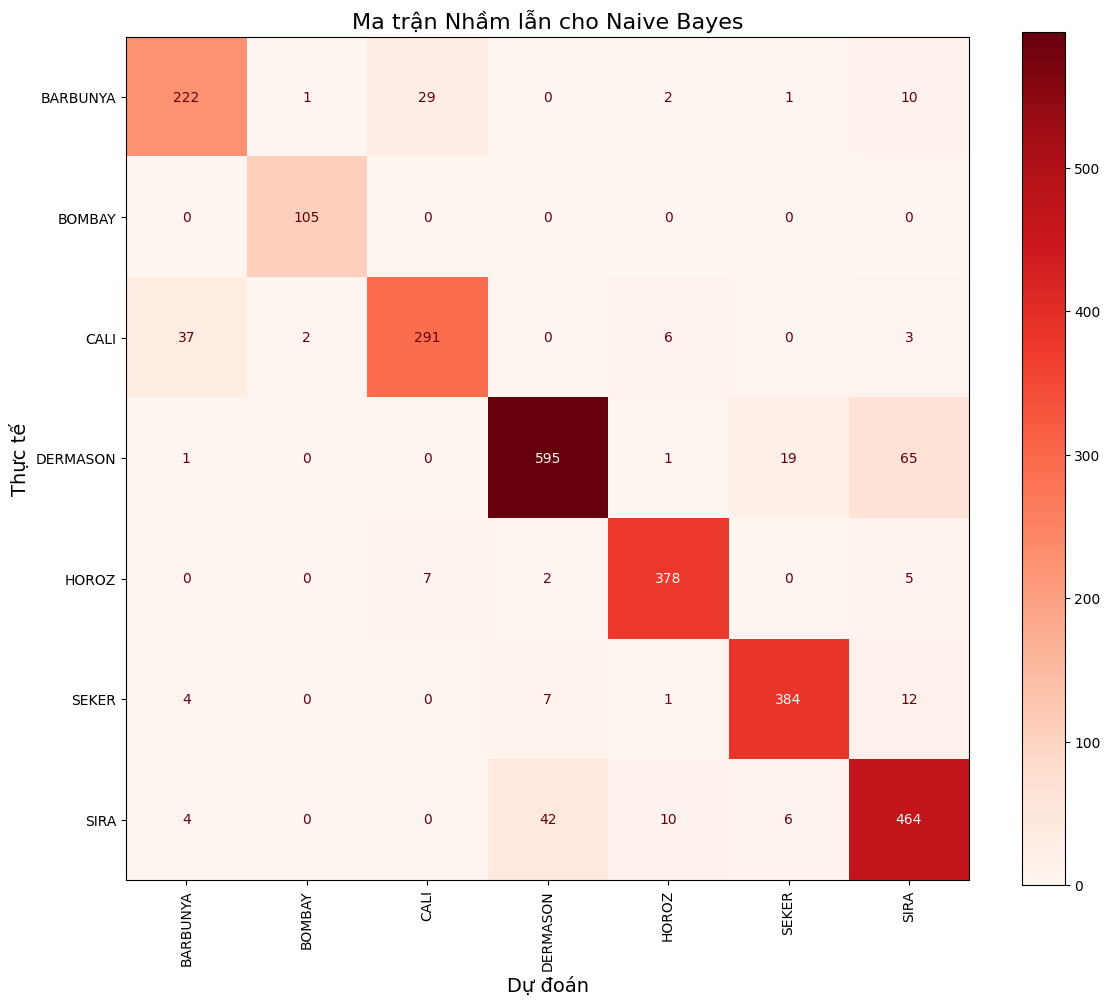

In [60]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    gnb, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho Naive Bayes', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_lst = [x for x in range(50, 71) if x % 10 ==0]
for n in n_estimators_lst:
    rf = RandomForestClassifier(n_estimators=n,max_depth=20 , criterion="entropy", min_samples_leaf=7, random_state=42)
    start_time = time.time()
    rf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time-start_time
    y_pred_rf = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_rf, average='weighted')
    f1 = f1_score(y_test, y_pred_rf, average='weighted')
    # rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    print(f"===== Đánh giá mô hình RF với n_estimators = {n} =====")
    print(f"Thời gian Train: {training_time:.4f} giây")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    # print(f"RMSE     : {rmse:.4f}")
    # print("\nBáo cáo chi tiết:\n", classification_report(y_test, y_pred_rf))

with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

===== Đánh giá mô hình RF với n_estimators = 50 =====
Thời gian Train: 3.6418 giây
Accuracy : 0.9227
Precision: 0.9231
Recall   : 0.9227
F1-score : 0.9227
===== Đánh giá mô hình RF với n_estimators = 60 =====
Thời gian Train: 4.3326 giây
Accuracy : 0.9212
Precision: 0.9216
Recall   : 0.9212
F1-score : 0.9212
===== Đánh giá mô hình RF với n_estimators = 70 =====
Thời gian Train: 5.0299 giây
Accuracy : 0.9205
Precision: 0.9209
Recall   : 0.9205
F1-score : 0.9205


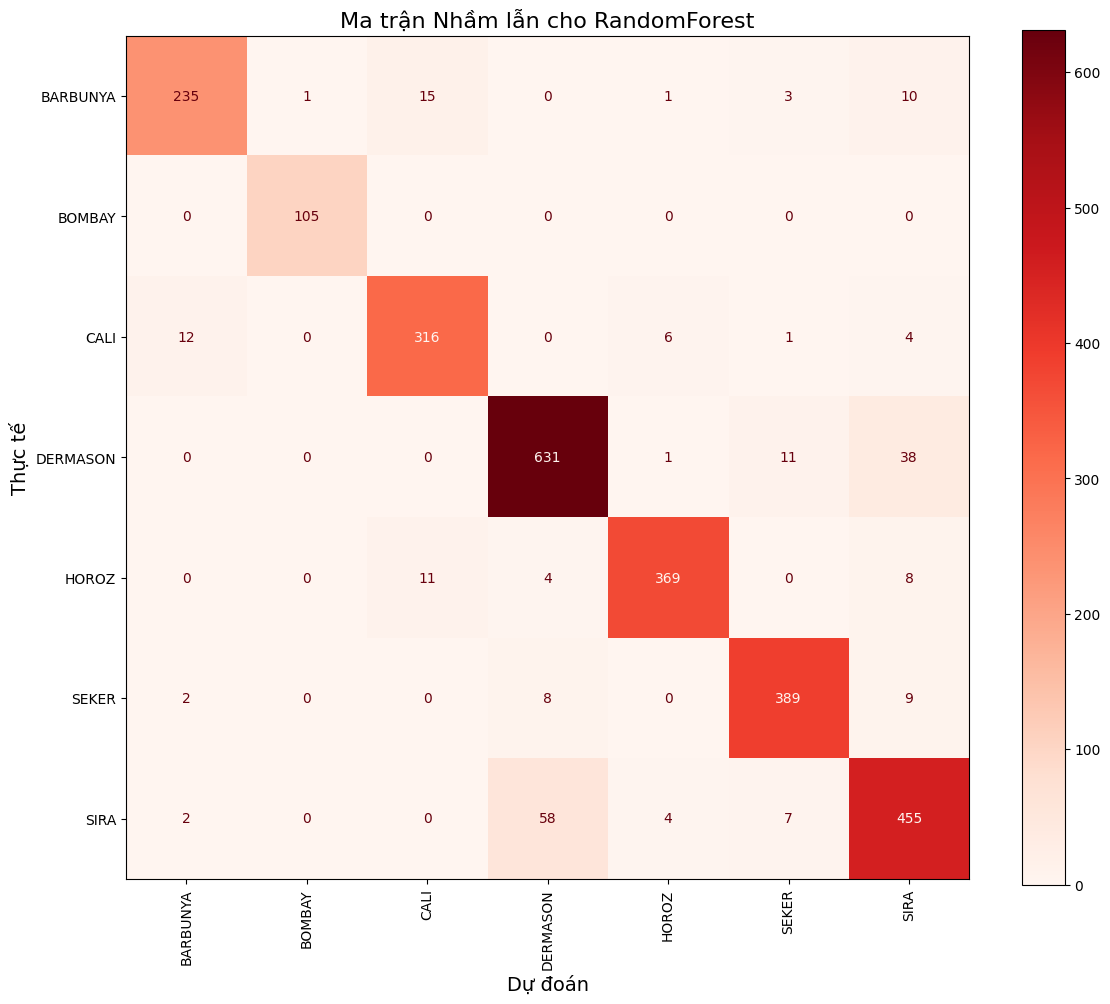

In [62]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    rf, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho RandomForest', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()

## Mô hình Logistic Regression

In [63]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(max_iter=200)
# log_reg.fit(X_train, y_train)
# y_pred_logreg = log_reg.predict(X_test)

# print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# with open('models/logistic_regression_model.pkl', 'wb') as f:
#     pickle.dump(log_reg, f)

In [64]:
# cmap_hot = plt.cm.Reds

# fig, ax = plt.subplots(figsize=(12, 10))
# ConfusionMatrixDisplay.from_estimator(
#     log_reg, 
#     X_test, 
#     y_test, 
#     cmap=cmap_hot, 
#     ax=ax,
#     display_labels=sorted(y.unique()), 
#     xticks_rotation='vertical',
#     values_format='d' 
# )
# plt.title('Ma trận Nhầm lẫn cho hồi quy Logistic', fontsize=16)
# plt.xlabel('Dự đoán', fontsize=14)
# plt.ylabel('Thực tế', fontsize=14)
# plt.tight_layout()
# plt.show()

## Mô hình SVM (SupportVectorMachine)

In [14]:
from sklearn.svm import SVC
start_time = time.time()
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time-start_time
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print("===== Đánh giá mô hình SVM =====")
print(f"Kernel = Linear")
print(f"Thời gian Train: {training_time:.4f} giây")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
# print(f"RMSE     : {rmse:.4f}")
# print("\nBáo cáo chi tiết:\n", classification_report(y_test, y_pred_svm))

with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

===== Đánh giá mô hình SVM =====
Kernel = Linear
Thời gian Train: 0.8424 giây
Accuracy : 0.9216
Precision: 0.9224
Recall   : 0.9216
F1-score : 0.9218


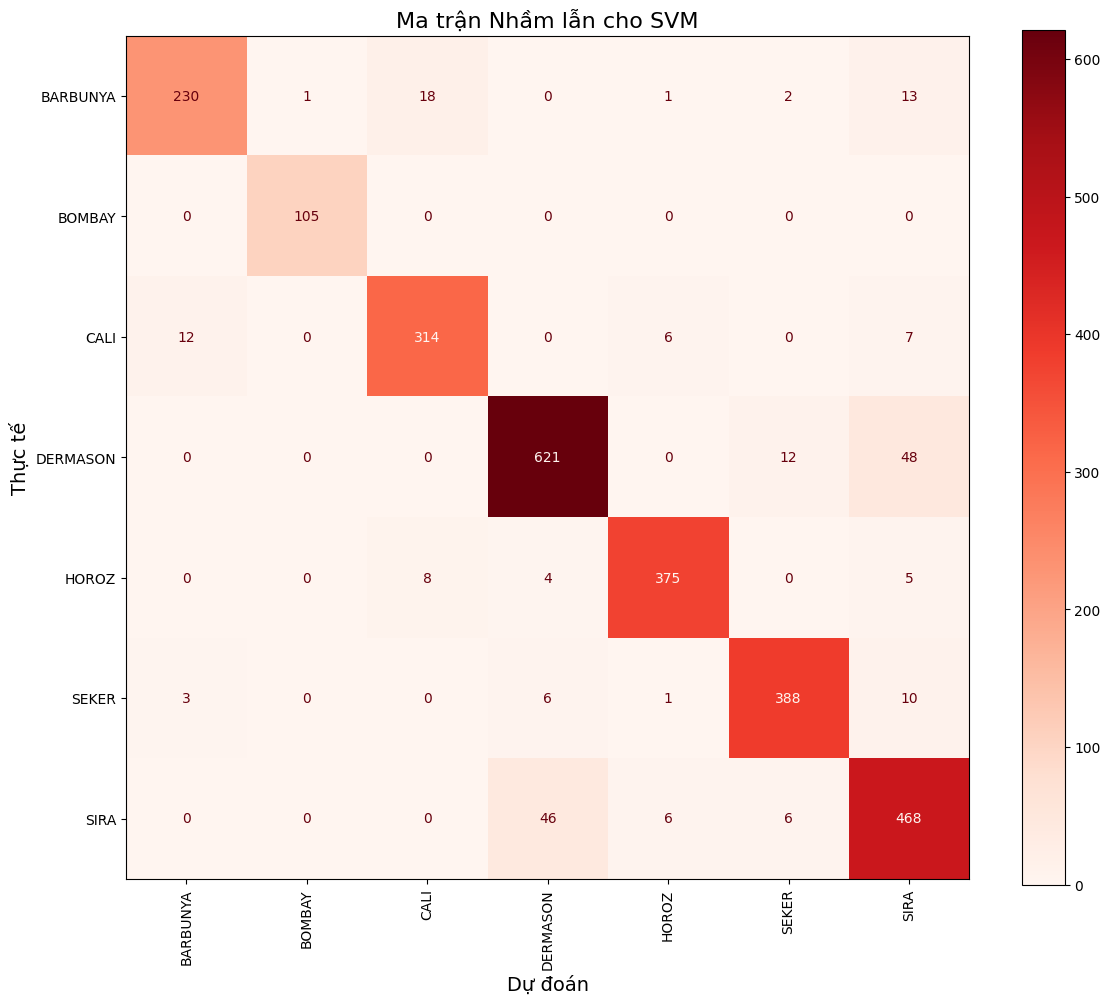

In [66]:
cmap_hot = plt.cm.Reds

fig, ax = plt.subplots(figsize=(12, 10))
ConfusionMatrixDisplay.from_estimator(
    svm_model, 
    X_test, 
    y_test, 
    cmap=cmap_hot, 
    ax=ax,
    display_labels=sorted(y.unique()), 
    xticks_rotation='vertical',
    values_format='d' 
)
plt.title('Ma trận Nhầm lẫn cho SVM', fontsize=16)
plt.xlabel('Dự đoán', fontsize=14)
plt.ylabel('Thực tế', fontsize=14)
plt.tight_layout()
plt.show()